In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

## Data

In [2]:
data = pd.read_excel('dataset_re_full2.xlsx')
#TODO: mudar dataset para um arquivo xlsx para enviar pra Profa.

In [16]:
# datahw01 = data.iloc[60000:64000,:] # 4k do meio
datahw01 = data.iloc[0:4000,:]      # 4k inicio
datahw01.size, datahw01.shape

(32000, (4000, 8))

In [17]:
datahw01.head()

,Signal (dBm),Speed (m/s),Distance from site (m),Call Test Duration (s),Call Test Result,Call Test Technology,Call Test Setup Time (s),MOS
0,-61,68.800003,1048.60,90.0,1,1,0.56,2
1,-61,68.769997,1855.54,90.0,1,1,0.45,3
2,-71,69.169998,1685.62,90.0,1,1,0.51,2
3,-65,69.279999,1770.92,90.0,1,1,0.00,1
4,-103,0.820000,256.07,60.0,1,1,3.35,4


## Unconditional mono-variate analysis

In [18]:
unc_monovar = datahw01.describe().iloc[1:3,:-1].append(datahw01.skew()[:-1], ignore_index=True)
unc_monovar.index = ['Mean $\mu_d$','std $\sigma_d$','Skewness $\gamma_d$']
unc_monovar

,Signal (dBm),Speed (m/s),Distance from site (m),Call Test Duration (s),Call Test Result,Call Test Technology,Call Test Setup Time (s)
Mean $\mu_d$,-96.589750,7.242425,1151.234110,86.62422,0.990750,1.575250,1.546487
std $\sigma_d$,19.214389,16.969282,3021.213917,68.76919,0.095743,0.522882,1.709382
Skewness $\gamma_d$,0.273029,2.867141,9.818498,8.99465,-10.256526,-0.607759,2.299115


In [ ]:
# unc_monovar.to_excel('hw01-results/hw01-data/unc_monovar.xlsx')

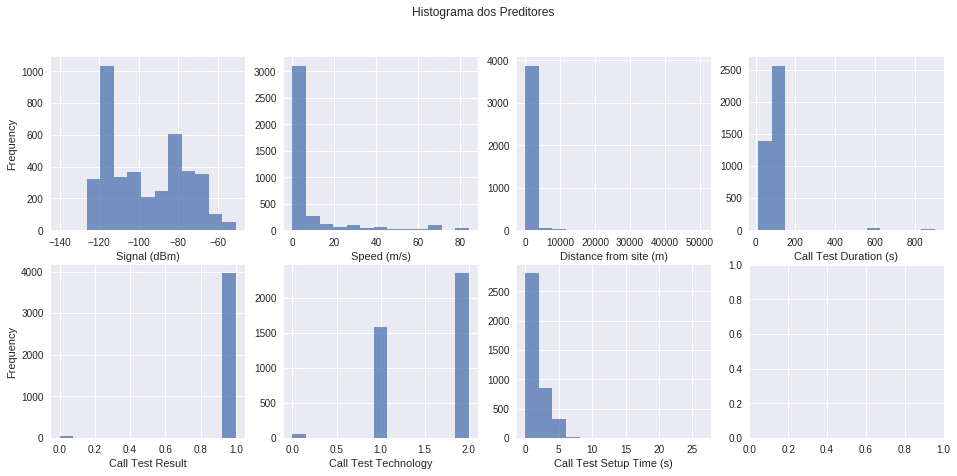

In [27]:
fig, ax = plt.subplots(2, 4, figsize=(16, 7)) 
ax = ax.ravel()
fig.suptitle('Histograma dos Preditores')
for i in range(0, 7):
    ax[i].set_xlabel(datahw01.columns[i])
    ax[0].set_ylabel('Frequency')
    ax[4].set_ylabel('Frequency')
    ax[i].hist(datahw01.iloc[:, i], bins='sturges', alpha=.75)
    plt.savefig('hw01-figs/hist_data.pdf')

## Class-conditional mono-variate analysis

In [20]:
cls = datahw01.groupby('MOS')
classes = ['Bad (1)', 'Poor (2)', 'Fair (3)', 'Good (4)']
print('Classe  | Quantidade')
for i in cls.indices:
    print(f'{classes[i-1]} |    {cls.get_group(i).iloc[:,1:].shape[0]}')

Classe  | Quantidade
Bad (1) |    155
Poor (2) |    181
Fair (3) |    864
Good (4) |    2800


In [21]:
cls_monovar = []
for i in range(len(cls.indices)):
    cls_monovar.append(cls.get_group(i+1).describe().iloc[1:3,:-1].append(cls.get_group(1).skew()[:-1], 
                                                                          ignore_index=True))
    cls_monovar[i].index = ['Mean $\mu_{d|l_%d}$'%(i+1),'std $\sigma_{d|l_%d}$'%(i+1),
                            'Skewness $\gamma_{d|l_%d}$'%(i+1)]
    display(classes[i], cls_monovar[i])

'Bad (1)'

,Signal (dBm),Speed (m/s),Distance from site (m),Call Test Duration (s),Call Test Result,Call Test Technology,Call Test Setup Time (s)
Mean $\mu_{d|l_1}$,-80.941935,31.577548,3664.955935,89.383935,0.909677,0.948387,1.600581
std $\sigma_{d|l_1}$,12.426531,30.792243,8421.379477,99.725663,0.287573,0.297032,2.599546
Skewness $\gamma_{d|l_1}$,-0.792042,0.364759,3.714210,6.154428,-2.886456,-1.474720,3.627016


'Poor (2)'

,Signal (dBm),Speed (m/s),Distance from site (m),Call Test Duration (s),Call Test Result,Call Test Technology,Call Test Setup Time (s)
Mean $\mu_{d|l_2}$,-79.298343,31.374586,4066.876906,174.934088,0.983425,0.922652,1.221050
std $\sigma_{d|l_2}$,10.995931,26.760100,7821.943217,229.661951,0.128025,0.267884,1.836816
Skewness $\gamma_{d|l_2}$,-0.792042,0.364759,3.714210,6.154428,-2.886456,-1.474720,3.627016


'Fair (3)'

,Signal (dBm),Speed (m/s),Distance from site (m),Call Test Duration (s),Call Test Result,Call Test Technology,Call Test Setup Time (s)
Mean $\mu_{d|l_3}$,-76.068287,8.851280,794.248102,69.983414,0.997685,0.991898,3.471424
std $\sigma_{d|l_3}$,10.113205,16.612288,2331.650249,64.006028,0.048085,0.122466,1.467665
Skewness $\gamma_{d|l_3}$,-0.792042,0.364759,3.714210,6.154428,-2.886456,-1.474720,3.627016


'Good (4)'

,Signal (dBm),Speed (m/s),Distance from site (m),Call Test Duration (s),Call Test Result,Call Test Technology,Call Test Setup Time (s)
Mean $\mu_{d|l_4}$,-104.906071,3.838884,933.761854,85.897725,0.993571,1.832143,0.970550
std $\sigma_{d|l_4}$,15.735105,12.052527,1594.345069,31.044137,0.079935,0.395178,1.199660
Skewness $\gamma_{d|l_4}$,-0.792042,0.364759,3.714210,6.154428,-2.886456,-1.474720,3.627016


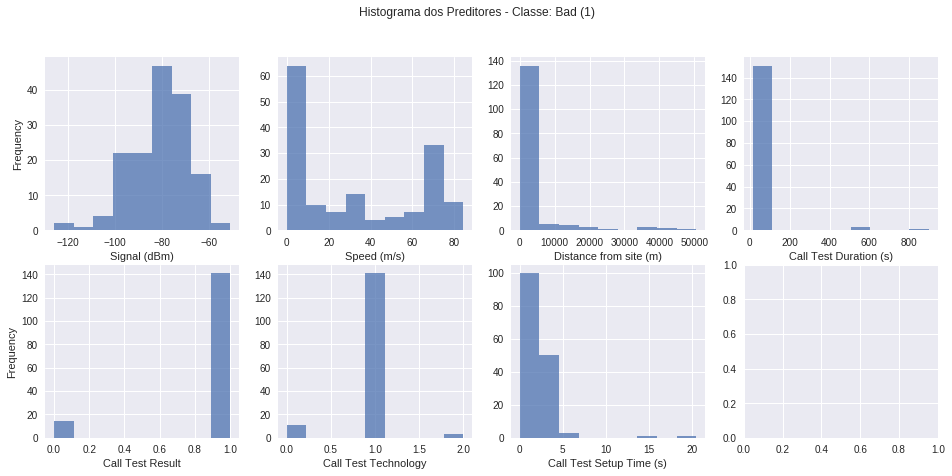

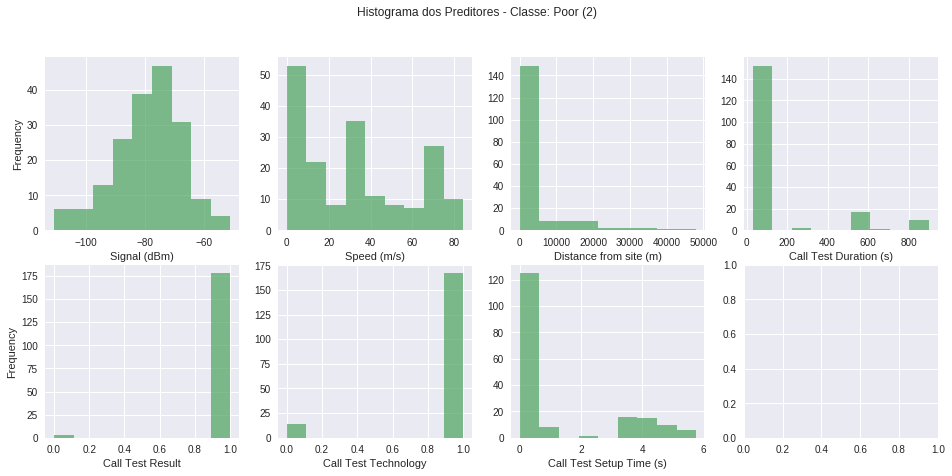

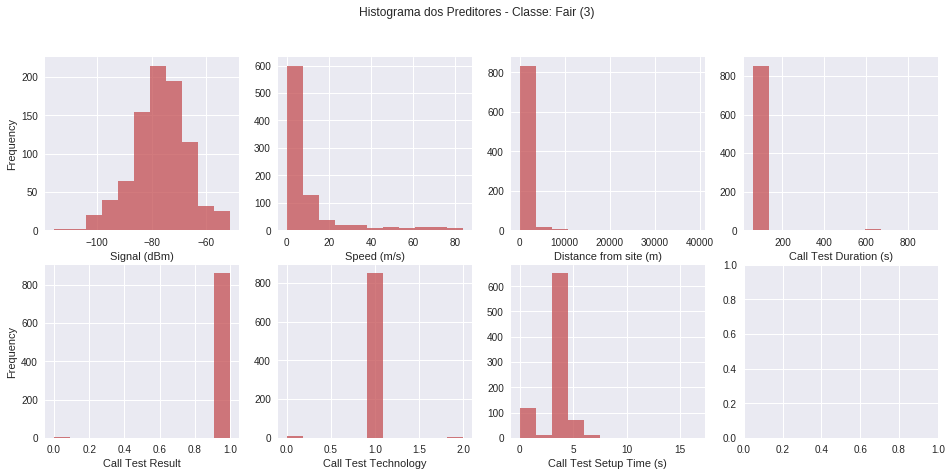

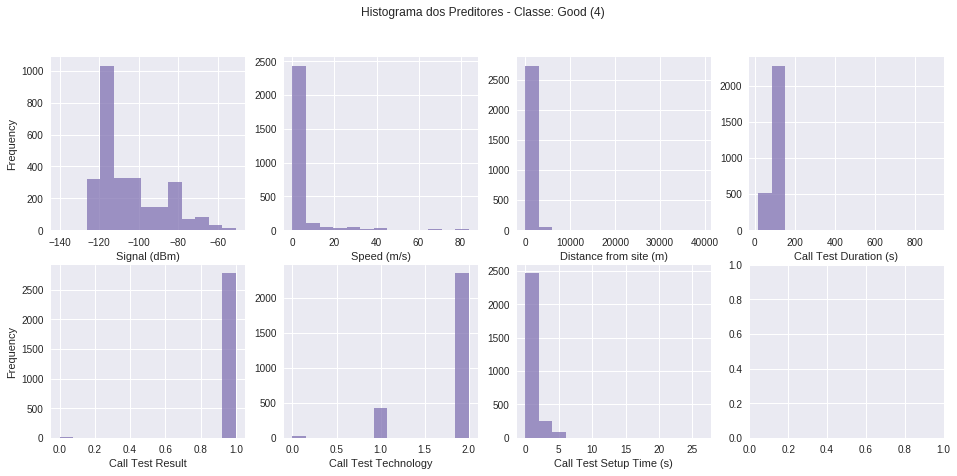

In [28]:
color=['C0','C1','C2','C3']
for j in cls.indices:
    fig, ax = plt.subplots(2, 4, figsize=(16, 7)) 
    ax = ax.ravel()
    fig.suptitle(f'Histograma dos Preditores - Classe: {classes[j-1]}')
    for i in range(0, 7):
        ax[i].set_xlabel(cls.get_group(j).columns[i])
        ax[0].set_ylabel('Frequency')
        ax[4].set_ylabel('Frequency')
        ax[i].hist(cls.get_group(j).iloc[:, i], bins='sturges', color=color[j-1], alpha=.75)
    plt.savefig(f'hw01-figs/hist_C{j}.pdf')

## Tranformações no dados

centering and scaling

In [23]:
scaled_datahw01 = datahw01.iloc[:,:-1]
scaled_datahw01 = (scaled_datahw01 - scaled_datahw01.mean())/scaled_datahw01.std()
scaled_datahw01.head()

,Signal (dBm),Speed (m/s),Distance from site (m),Call Test Duration (s),Call Test Result,Call Test Technology,Call Test Setup Time (s)
0,1.852245,3.627589,-0.033971,0.049089,0.096613,-1.100152,-0.577102
1,1.852245,3.625820,0.233120,0.049089,0.096613,-1.100152,-0.641452
2,1.331801,3.649393,0.176878,0.049089,0.096613,-1.100152,-0.606352
3,1.644067,3.655875,0.205112,0.049089,0.096613,-1.100152,-0.904705
4,-0.333617,-0.378474,-0.296293,-0.387153,0.096613,-1.100152,1.055067


In [ ]:
# Apenas p/ visualização do normalizado
# fig, ax = plt.subplots(2, 4, figsize=(16, 7)) 
# ax = ax.ravel()
# fig.suptitle('Histograma dos Preditores')
# for i in range(0, 7):
#     ax[i].set_xlabel(scaled_datahw01.columns[i])
#     ax[0].set_ylabel('Frequency')
#     ax[4].set_ylabel('Frequency')
#     ax[i].hist(scaled_datahw01.iloc[:, i], bins='sturges', alpha=.75)

## Matriz de Correlação e Scatter plot dos preditores

In [24]:
data_pair_corr = scaled_datahw01.corr()
data_pair_corr

,Signal (dBm),Speed (m/s),Distance from site (m),Call Test Duration (s),Call Test Result,Call Test Technology,Call Test Setup Time (s)
Signal (dBm),1.000000,0.305035,0.039808,-0.065430,0.023676,-0.759307,0.521164
Speed (m/s),0.305035,1.000000,0.313009,0.097791,-0.234168,-0.319119,-0.139659
Distance from site (m),0.039808,0.313009,1.000000,0.128069,-0.111419,-0.137912,-0.130046
Call Test Duration (s),-0.065430,0.097791,0.128069,1.000000,-0.010266,-0.019044,-0.254634
Call Test Result,0.023676,-0.234168,-0.111419,-0.010266,1.000000,0.056365,0.035601
Call Test Technology,-0.759307,-0.319119,-0.137912,-0.019044,0.056365,1.000000,-0.604043
Call Test Setup Time (s),0.521164,-0.139659,-0.130046,-0.254634,0.035601,-0.604043,1.000000


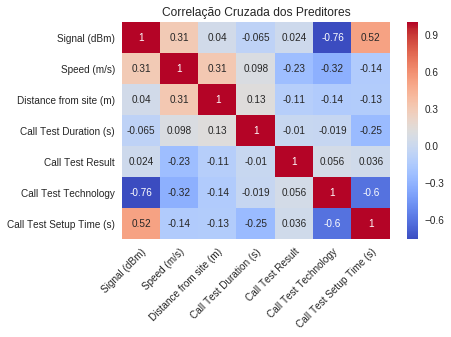

In [25]:
ax = sns.heatmap(data_pair_corr, annot=True, cmap='coolwarm')
ax.set_title('Correlação Cruzada dos Preditores')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
fig = ax.get_figure()
plt.show()
# fig.savefig('hw01-figs/data_corr.pdf', bbox_inches='tight')

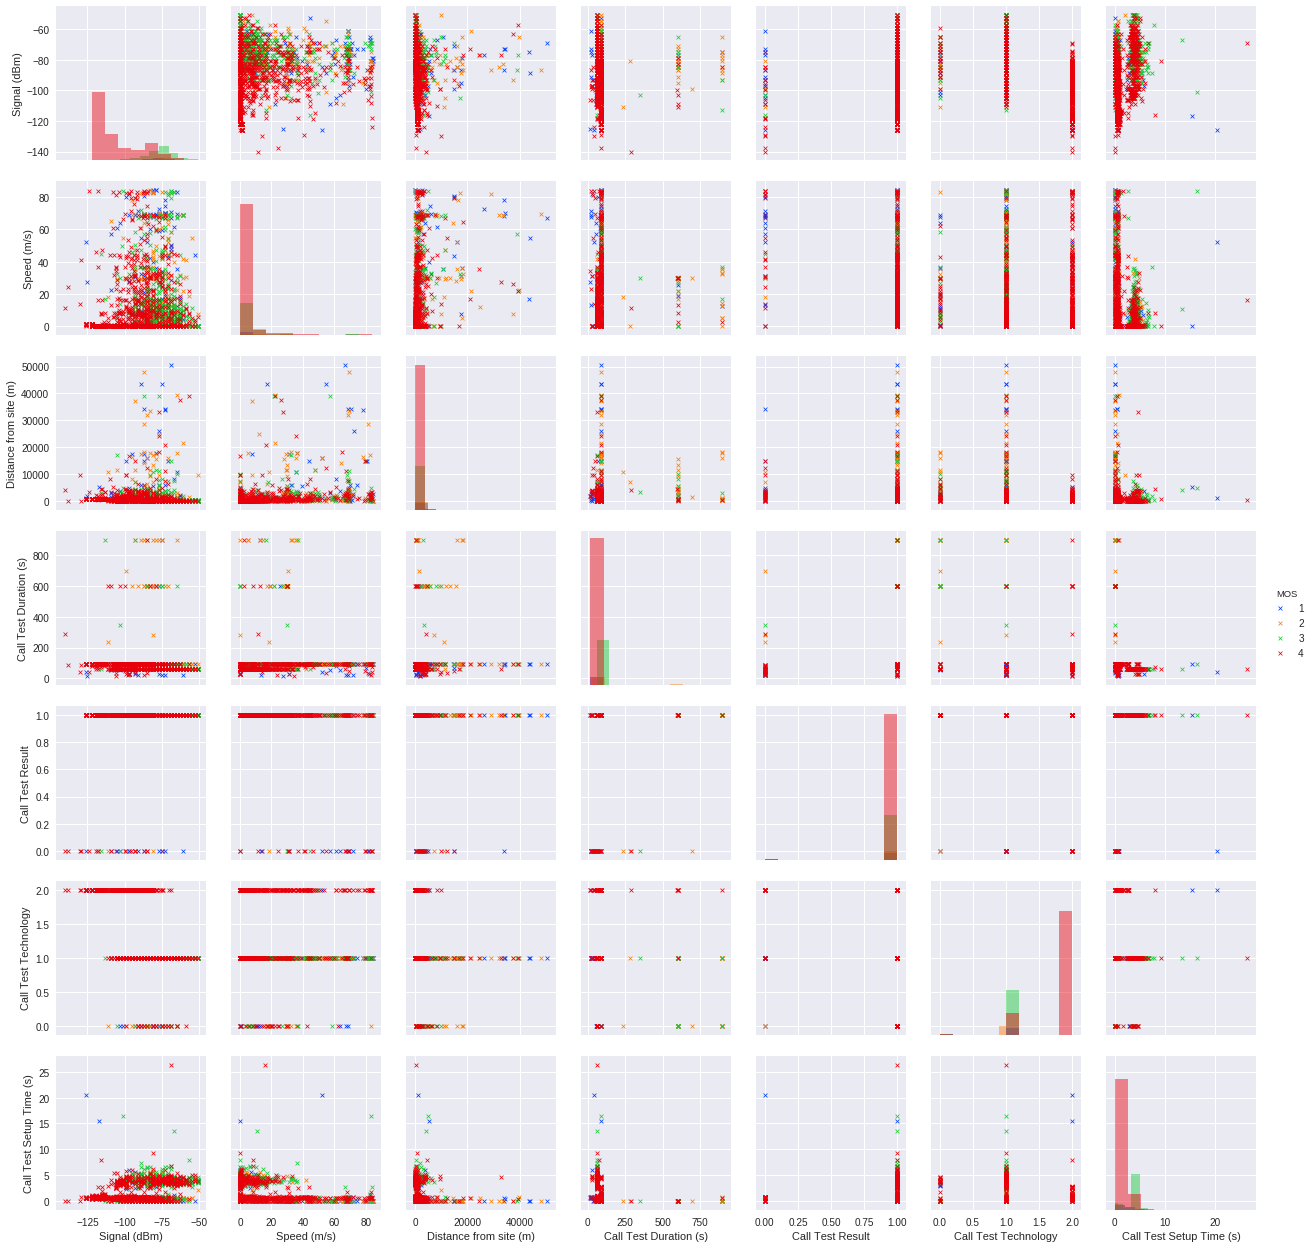

In [26]:
ax = sns.pairplot(datahw01, hue='MOS', palette='bright', vars=datahw01.columns[:-1], 
                  diag_kind='hist', plot_kws={"s": 15, "marker": 'x'}, diag_kws={"alpha": 0.45})
ax.fig.savefig('hw01-figs/data_scatter.png', dpi=400)

## Q4 PCA

### Informações   RASCUNHO

 - Dados:

929 observações e 9 colunas, totalizando size=8370 com 7 preditores e 4 classes

1 = sucesso no teste = 919  
0 = falhas no teste  = 11

- Preditores:

```['Signal (dBm)', 'Speed (m/s)', 'Distance from site (m)', 'Call Test Duration (s)', 'Call Test Result', 'Call Test Technology' , 'Call Test Setup Time (s)']```

- Tecnologias:

| Rating  | Label | Total|
| ------------- | ------------- | ------------- |
| 0  | GSM  | 21 |
| 1  | UMTS  | 270 |
| 2  | LTE  | 639 |


- Classes MOS

4 classes no dataset: 

| Rating  | Label | Total|
| ------------- | ------------- | ------------- |
| 1  | Bad  | 39 |
| 2  | Poor  | 47 |
| 3  | Fair  | 125 |
| 4  | Good  | 719 |

https://en.wikipedia.org/wiki/Mean_opinion_score

Links úteis:

https://pandas.pydata.org/pandas-docs/stable/reference/frame.html  
https://pandas.pydata.org/pandas-docs/stable/reference/series.html


In [ ]:
# unicas ocorrencias
# datahw01['MOS'].nunique()
# busca por valores:
# for i in range(8):
#     print(datahw01.iloc[:,i+1].all()==0)
# grupos:
# grouped = datahw01.groupby('MOS')
# print('mos class:')
# for name, group in grouped:
#     print(name)
#     print(group.shape)
# .dropna .replace .apply

#TODO: descrição do conjunto de amostras utilizado
#TODO: dataframe to excel sem latex symbols